In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cars.csv")
conn = sqlite3.connect("cars.db")
df.to_sql("car", conn, if_exists="replace")

cursor = conn.cursor()

If at least one of these columns has an empty string, the corresponding row will be deleted.

In [3]:
delete_query = """
DELETE FROM car
WHERE make = '' OR model = '' OR price = '' OR year = '' OR kilometer = '' OR `fuel type` = '' OR transmission = '' OR location = '' OR color = '' OR owner = '' OR `seller type` = ''
   OR engine = '' OR `max power` = '' OR `max torque` = '' OR drivetrain = '' OR length = '' OR width = '' OR height = '' OR `seating capacity` = '' OR `fuel tank capacity` = '';
"""

cursor.execute(delete_query)
conn.commit()

Here, I count how many cars used Petrol or Diesel and I do that by using the sum() function. Additionally, I also get the percentage of each fuel type.

Next, I create a label for the pie chart, I used a list comprehension so it will look more clean and readable. I also consulted at this source on how to make a pie chart:
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

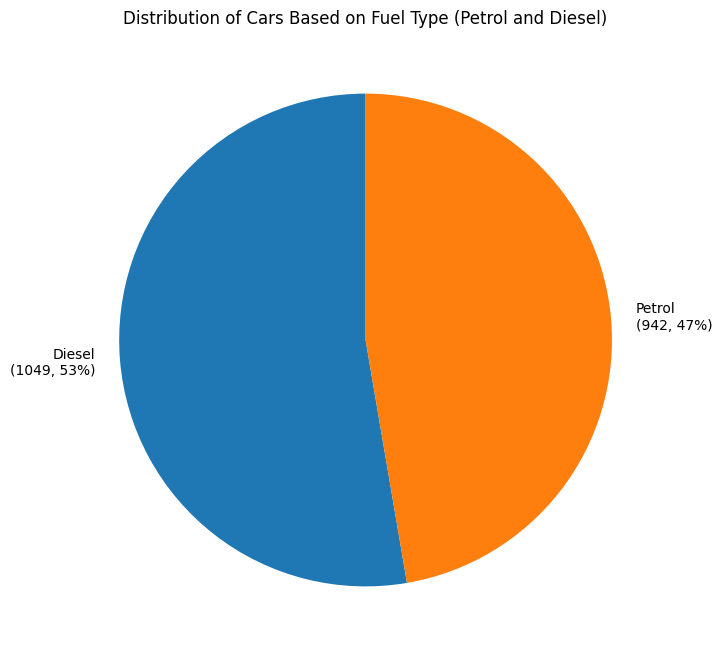

In [4]:
fuel_count_query = """
SELECT `Fuel Type` AS fuel_type, COUNT(*) AS count 
FROM car
WHERE `Fuel Type` IN ('Petrol', 'Diesel')
GROUP BY `Fuel Type`;
"""

fuel_count_df = pd.read_sql_query(fuel_count_query, conn)

total_count = fuel_count_df['count'].sum()
fuel_count_df['percentage'] = (fuel_count_df['count'] / total_count) * 100

plt.figure(figsize=(8, 8))

labels = [f"{fuel_type}\n({count}, {percentage:.0f}%)" for fuel_type, count, percentage in zip(fuel_count_df['fuel_type'], fuel_count_df['count'], fuel_count_df['percentage'])]

plt.pie(fuel_count_df['count'], labels=labels, startangle=90, autopct='')
plt.title('Distribution of Cars Based on Fuel Type (Petrol and Diesel)')
plt.show()

Here, I just set conditions based on what is asked. I used AS function since I'm dealing with two cars and I also made sure that the car is different from one another. Then finally, I add the prices and print the results based on the lowest mileage. Moreover, most of the syntax I used here is based from the lesson https://sqlbolt.com/

In [5]:
car_pairs_query = """
SELECT c1.make AS make1, c1.model AS model1, c2.make AS make2, c2.model AS model2
FROM car c1
JOIN car c2 ON c1.make < c2.make AND c1.model < c2.model
WHERE c1.`seller type` = 'Individual'
    AND c2.`seller type` = 'Individual'
    AND c1.`transmission` = 'Automatic'
    AND c2.`transmission` = 'Automatic'
    AND c1.`price` + c2.`price` <= 1000000
ORDER BY c1.`kilometer`+ c2.`kilometer`;
"""
car_pairs_df = pd.read_sql_query(car_pairs_query, conn)

print("Selected Car Pairs:")
for index, row in car_pairs_df.iterrows():
    print(f"Make1: {row['make1']}, Model1: {row['model1']}, Make2: {row['make2']}, Model2: {row['model2']}")

cursor.close()
conn.close()

Selected Car Pairs:
Make1: Maruti Suzuki, Model1: Celerio VXi AMT, Make2: Renault, Model2: Kwid 1.0 RXT AMT Opt
Make1: Maruti Suzuki, Model1: Celerio VXi AMT, Make2: Tata, Model2: Tiago Revotron XTA [2017-2019]
Make1: Maruti Suzuki, Model1: Alto VXi AMT [2014-2018], Make2: Renault, Model2: Kwid 1.0 RXT AMT Opt
Make1: Honda, Model1: Amaze 1.2 VX AT i-VTEC, Make2: Maruti Suzuki, Model2: S-Presso VXi AMT
Make1: Maruti Suzuki, Model1: Alto VXi AMT [2014-2018], Make2: Tata, Model2: Tiago Revotron XTA [2017-2019]
Make1: Renault, Model1: Kwid 1.0 RXT AMT Opt, Make2: Skoda, Model2: Rapid Ambition 1.6 MPI AT Plus
Make1: Maruti Suzuki, Model1: Celerio ZXi AMT [2019-2020], Make2: Skoda, Model2: Rapid Ambition 1.6 MPI AT Plus
Make1: Maruti Suzuki, Model1: S-Presso VXi AMT, Make2: Tata, Model2: Tiago Revotron XZA [2017-2019]
Make1: Maruti Suzuki, Model1: S-Presso VXi AMT, Make2: Tata, Model2: Tiago Revotron XTA [2017-2019]
Make1: Maruti Suzuki, Model1: Celerio VXi AMT, Make2: Tata, Model2: Tiago Re